In [123]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import tensorflow as tf
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# DATA LOADING

In [124]:
Ravdess = "RAVDESS/audio_speech_actors_01-24"
Crema = "CREMAD"
Tess = "TESS/TESS Toronto emotional speech set data"
Savee = "SAVEE"

In [125]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df

,Emotions,Path
0,fear,RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
1,calm,RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
2,angry,RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
3,surprise,RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
4,calm,RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
...,...,...
1435,surprise,RAVDESS/audio_speech_actors_01-24/Actor_14/03-...
1436,sad,RAVDESS/audio_speech_actors_01-24/Actor_14/03-...
1437,sad,RAVDESS/audio_speech_actors_01-24/Actor_14/03-...
1438,neutral,RAVDESS/audio_speech_actors_01-24/Actor_14/03-...


In [126]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(os.path.join(Crema, file))
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,fear,CREMAD/1032_IWW_FEA_XX.wav
1,disgust,CREMAD/1035_WSI_DIS_XX.wav
2,sad,CREMAD/1059_ITS_SAD_XX.wav
3,angry,CREMAD/1079_TAI_ANG_XX.wav
4,neutral,CREMAD/1034_IEO_NEU_XX.wav


In [127]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(Tess, dir, file))
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,happy,TESS/TESS Toronto emotional speech set data/OA...
1,happy,TESS/TESS Toronto emotional speech set data/OA...
2,happy,TESS/TESS Toronto emotional speech set data/OA...
3,happy,TESS/TESS Toronto emotional speech set data/OA...
4,happy,TESS/TESS Toronto emotional speech set data/OA...


In [128]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file))
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,disgust,SAVEE/JK_d11.wav
1,sad,SAVEE/KL_sa07.wav
2,neutral,SAVEE/KL_n10.wav
3,neutral,SAVEE/KL_n07.wav
4,sad,SAVEE/JE_sa01.wav


In [129]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head

<bound method NDFrame.head of      Emotions                                               Path
0        fear  RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
1        calm  RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
2       angry  RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
3    surprise  RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
4        calm  RAVDESS/audio_speech_actors_01-24/Actor_23/03-...
..        ...                                                ...
475  surprise                                  SAVEE/KL_su09.wav
476      fear                                   SAVEE/JE_f08.wav
477       sad                                  SAVEE/DC_sa02.wav
478   disgust                                   SAVEE/JK_d14.wav
479   disgust                                   SAVEE/DC_d13.wav

[12162 rows x 2 columns]>

In [130]:
print(data_path.Emotions.value_counts())

Emotions
fear        1923
angry       1923
disgust     1923
happy       1923
sad         1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64


# DATA EXPLORATION

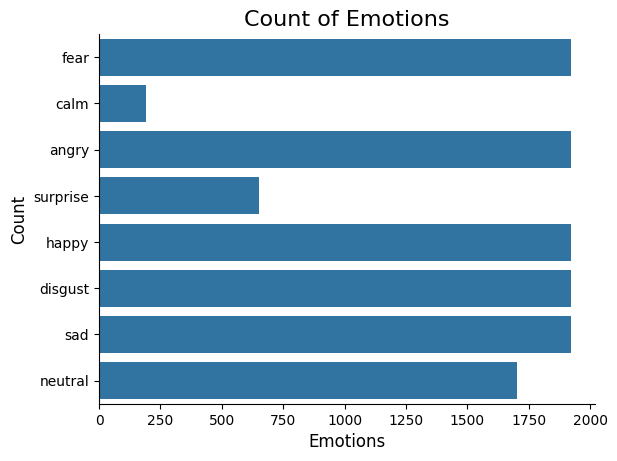

In [119]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [20]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

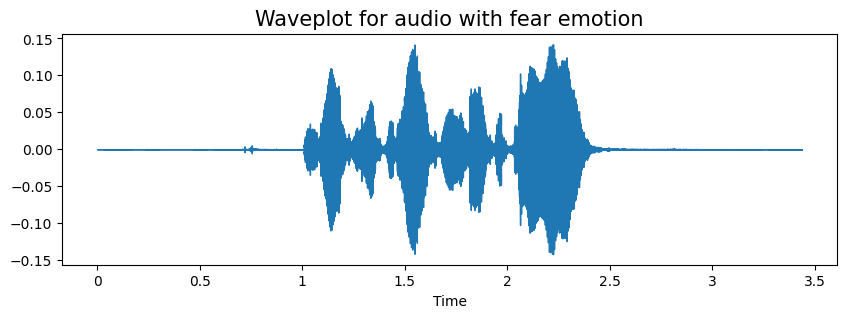

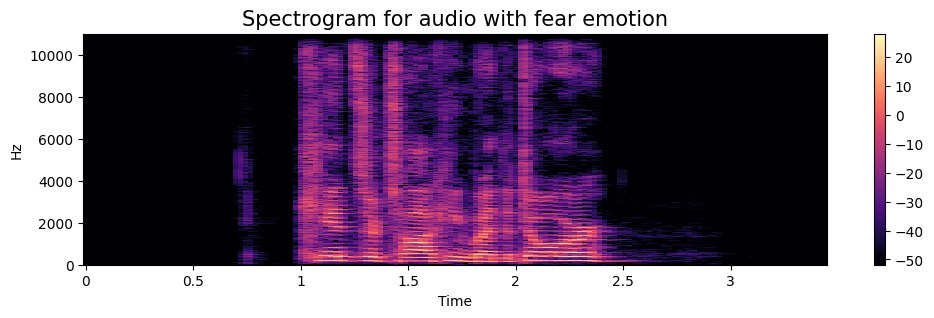

In [21]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# DATA AUGMENTATION

In [41]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

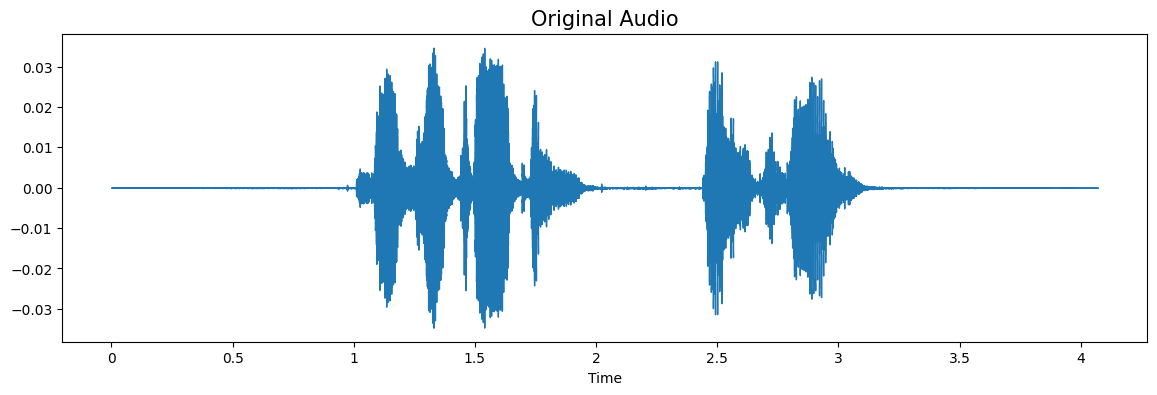

In [42]:
# taking any example and checking for techniques.
path = np.array(Ravdess_df.Path)[1]
data, sample_rate = librosa.load(path)

plt.figure(figsize=(14,4))
plt.title('Original Audio', size=15)
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

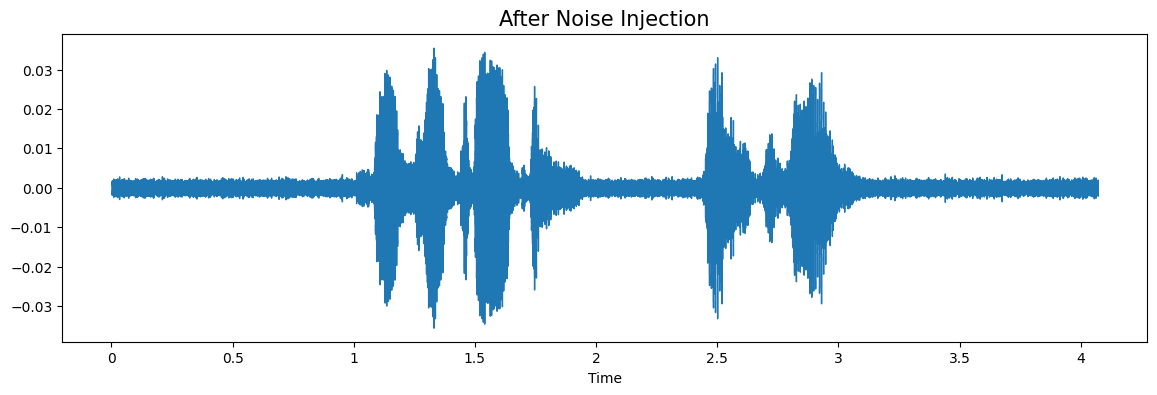

In [43]:
x = noise(data)
plt.figure(figsize=(14,4))
plt.title('After Noise Injection', size=15)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

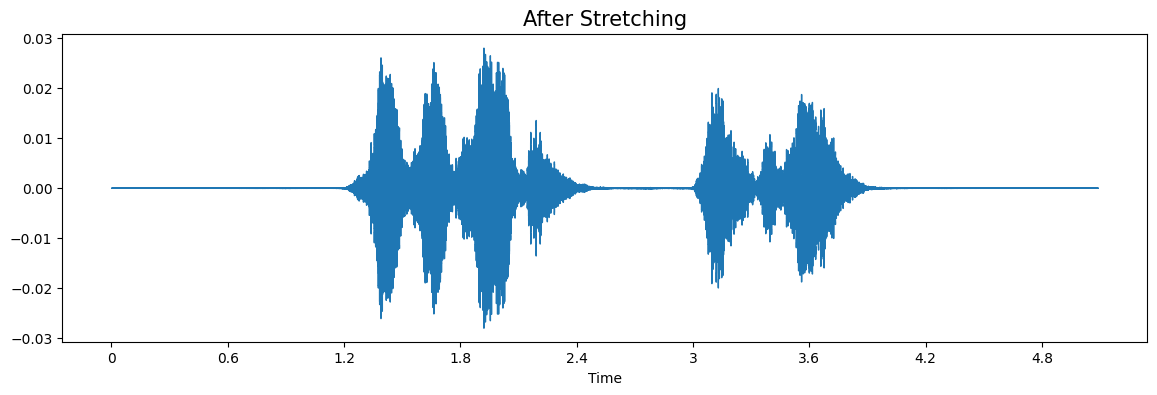

In [44]:
x = stretch(data)
plt.figure(figsize=(14,4))
plt.title('After Stretching', size=15)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

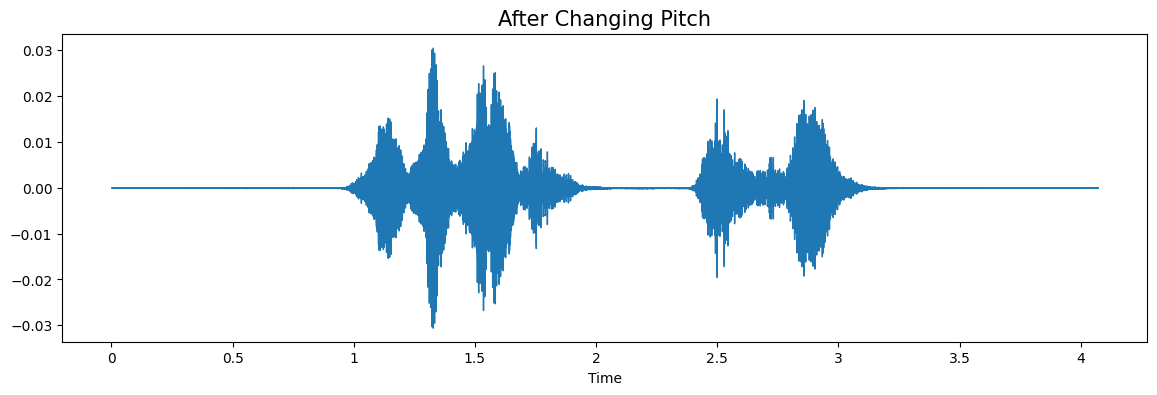

In [45]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
plt.title('After Changing Pitch', size=15)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# FEATURE EXTRACTION

In [139]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [140]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)  

2it [00:00,  8.29it/s]

0 audio has been processed


502it [00:52,  9.73it/s]

500 audio has been processed


1002it [01:44,  9.63it/s]

1000 audio has been processed


1502it [02:34, 13.08it/s]

1500 audio has been processed


2002it [03:16, 11.95it/s]

2000 audio has been processed


2503it [03:56, 12.40it/s]

2500 audio has been processed


3003it [04:37, 12.35it/s]

3000 audio has been processed


3503it [05:18, 12.03it/s]

3500 audio has been processed


4003it [05:59, 12.78it/s]

4000 audio has been processed


4502it [06:40, 11.28it/s]

4500 audio has been processed


5002it [07:21, 12.51it/s]

5000 audio has been processed


5502it [08:03, 11.21it/s]

5500 audio has been processed


6002it [08:44, 12.29it/s]

6000 audio has been processed


6502it [09:25, 12.87it/s]

6500 audio has been processed


7002it [10:06, 11.80it/s]

7000 audio has been processed


7502it [10:48, 11.47it/s]

7500 audio has been processed


8002it [11:29, 13.02it/s]

8000 audio has been processed


8502it [12:10, 13.51it/s]

8500 audio has been processed


9004it [12:48, 15.52it/s]

9000 audio has been processed


9502it [13:21, 11.68it/s]

9500 audio has been processed


10002it [14:01, 11.48it/s]

10000 audio has been processed


10503it [14:34, 13.21it/s]

10500 audio has been processed


11004it [15:06, 20.58it/s]

11000 audio has been processed


11504it [15:34, 15.28it/s]

11500 audio has been processed


12002it [16:09, 12.78it/s]

12000 audio has been processed


12162it [16:22, 12.38it/s]

Done
Time:  982.1012142063119


In [141]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

In [142]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.355957,0.580566,0.792969,0.860352,0.838379,0.816895,0.825195,0.839844,0.851562,0.857910,...,10.564420,5.115136,-0.076168,2.268347,8.325958,11.352049,7.927417,0.141215,-4.306784,fear
1,0.251465,0.373047,0.503906,0.513184,0.507324,0.511230,0.498535,0.490723,0.497070,0.499023,...,-5.063429,-1.375266,-0.999035,-3.461737,0.009727,2.886510,1.817022,-2.393043,1.364463,fear
2,0.273926,0.463379,0.664062,0.740234,0.815918,0.830566,0.819824,0.747559,0.656738,0.569336,...,2.187311,-0.227592,-1.342908,0.909549,3.939357,3.923303,0.801933,-1.653195,-0.707119,fear
3,0.249023,0.378906,0.507324,0.510254,0.496582,0.500000,0.500488,0.502930,0.515625,0.494141,...,4.522132,1.923078,0.454088,-0.866170,0.900086,3.451182,3.225992,-1.610945,-5.961364,fear
4,0.238770,0.409180,0.540039,0.509277,0.424805,0.301758,0.262207,0.306641,0.379883,0.474121,...,-23.921593,-7.130045,-1.626487,1.765229,6.750570,-1.896502,-1.044784,-0.090781,9.221346,calm


# DATA PREPARATION

In [167]:
Features = pd.read_csv('features.csv')
label_to_index = {'neutral':0, 'calm':1, 'happy':2, 'sad':3, 'angry':4, 'fear':5, 'disgust':6, 'surprise':7}
Y = Features['labels'].values
Y_indices = np.vectorize(label_to_index.get)(Y)

In [168]:
print(Features.isna().any())

0         False
1         False
2         False
3         False
4         False
          ...  
2372       True
2373       True
2374       True
2375       True
labels    False
Length: 2377, dtype: bool


In [169]:
Features=Features.fillna(0)
print(Features.isna().any())
Features.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2372      False
2373      False
2374      False
2375      False
labels    False
Length: 2377, dtype: bool


(48648, 2377)

In [170]:
np.sum(Features.isna())

0         0
1         0
2         0
3         0
4         0
         ..
2372      0
2373      0
2374      0
2375      0
labels    0
Length: 2377, dtype: int64

In [171]:
X = Features.iloc[: ,:-1].values

In [172]:
Y_indices[:10]

array([5, 5, 5, 5, 1, 1, 1, 1, 4, 4])

In [173]:
Y[:10]

array(['fear', 'fear', 'fear', 'fear', 'calm', 'calm', 'calm', 'calm',
       'angry', 'angry'], dtype=object)

In [174]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y_indices, random_state=0, test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918,), (9730, 2376), (9730,))

In [175]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918,), (9730, 2376), (9730,))

In [176]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376, 1), (38918,), (9730, 2376, 1), (9730,))

# SAVING TENSORS

In [177]:
import torch

# Convert x_train, x_test to float tensors and y_train, y_test to long tensors (for classification tasks)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Check shapes to confirm
x_train_tensor.shape, y_train_tensor.shape, x_test_tensor.shape, y_test_tensor.shape

(torch.Size([38918, 2376, 1]),
 torch.Size([38918]),
 torch.Size([9730, 2376, 1]),
 torch.Size([9730]))

In [178]:
import torch

# Save the tensors to a file
torch.save((x_train_tensor, y_train_tensor), 'train_data.pt')
torch.save((x_test_tensor, y_test_tensor), 'test_data.pt')
